# Bank Marketing Prediction Using SVM

In [146]:
# Import all the necessary libraries 
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
import itertools
%matplotlib inline

In [16]:
# Read the data
bank_data = pd.read_csv("C:\\Users\\320\\Python\\SVM\\bank-additional-full.csv", sep=';')

bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Understanding the data

Let us take a look into data and analyse for further insights.
* The whole data set has 41187 Observations and 21 Variables
* We can see that there are no missing data
* The data is a combination of Categorical and Numerical Values
* Our dependent Variable is Y. It is Categorical with 2 levels Yes/No.  Only 11% of the data is NO
* There are 20 independent Variables, out of which 10 are categorical and 10 are numerical
* 
* 

As SVM works better with the numerical datatype, we convert all the categories intp levels and use them in our model

In [137]:
# Looking at the distribution of the values in the dependent Variable
bank_data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [139]:
# Collect the feature variables
bank_data.columns
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

FACTORS are converted into integer levels so that it can be passed through SVM

In [140]:
bank_data['job']   = pd.factorize( bank_data['job']  )[0]
bank_data['marital']   = pd.factorize( bank_data['marital']  )[0]
bank_data['education']   = pd.factorize( bank_data['education']  )[0]
bank_data['default']   = pd.factorize( bank_data['default']  )[0]
bank_data['housing']   = pd.factorize( bank_data['housing']  )[0]
bank_data['loan']   = pd.factorize( bank_data['loan']  )[0]
bank_data['contact']   = pd.factorize( bank_data['contact']  )[0]
bank_data['month']   = pd.factorize( bank_data['month']  )[0]
bank_data['day_of_week']   = pd.factorize( bank_data['day_of_week']  )[0]
bank_data['poutcome']   = pd.factorize( bank_data['poutcome']  )[0]

In [141]:
bank_data_sample = bank_data.sample(n = 100 ,random_state= 60)

bank_data_sample.y.value_counts()

no     86
yes    14
Name: y, dtype: int64

In [142]:
x_training = np.array(bank_data_sample[features])
x_training

array([[ 3.2000e+01,  1.0000e+00,  0.0000e+00, ..., -4.6200e+01,
         1.2700e+00,  5.0991e+03],
       [ 3.4000e+01,  6.0000e+00,  0.0000e+00, ..., -4.6200e+01,
         1.3270e+00,  5.0991e+03],
       [ 5.2000e+01,  1.0000e+01,  0.0000e+00, ..., -4.7100e+01,
         1.4150e+00,  5.0991e+03],
       ...,
       [ 2.6000e+01,  4.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 2.9000e+01,  2.0000e+00,  1.0000e+00, ..., -4.7100e+01,
         1.3650e+00,  5.0991e+03],
       [ 5.6000e+01,  8.0000e+00,  0.0000e+00, ..., -4.2000e+01,
         4.1200e+00,  5.1958e+03]])

In [143]:
y_training  = bank_data_sample['y']
y_training

36182    yes
31532     no
28567     no
18273     no
25513     no
14446     no
6952      no
23786     no
40495    yes
13326     no
3244      no
22713     no
18364     no
12349     no
14719     no
9174      no
32476     no
2135      no
7220      no
22497    yes
30298     no
14076     no
35506    yes
33921     no
35529     no
11290     no
16945     no
4255      no
22532     no
31169     no
        ... 
8207      no
16287     no
1289      no
32187     no
22049     no
11946     no
9867      no
18613     no
12567     no
32518     no
21494     no
35912    yes
7904      no
33727     no
32589     no
9043      no
37268     no
25745     no
24721     no
10132     no
15570     no
34809     no
39881    yes
2204      no
40310    yes
28707     no
38871    yes
6056      no
30275     no
25570     no
Name: y, Length: 100, dtype: object

In [67]:
target_names = [ 'no', 'yes']
target_names

['no', 'yes']

## Seperating data for validation purposes

In [144]:
bank_data_Val_sample = bank_data.sample(n = 150 ,random_state= 60)

print(bank_data_Val_sample.y.value_counts())

x_validation = np.array(bank_data_Val_sample[features])
print(x_validation.shape)

y_validation  = bank_data_Val_sample['y']
print(y_validation.shape)

no     124
yes     26
Name: y, dtype: int64
(150, 20)
(150,)


Creating an user defined function to build a confusion matrix which we can use in our models

In [147]:
# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

# LINEAR MODEL

### Building the model

In [148]:
svc = svm.SVC(kernel='linear', C=0.007).fit(x_training, y_training)
svc

SVC(C=0.007, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Calculating the Accuracy

In [149]:
y_pred = svc.predict(x_validation)

y_true = y_validation

svc.score(x_validation,y_validation)

accuracy = metric.accuracy_score(y_true, y_pred, normalize = False )

accuracy = (accuracy/x_validation.shape[0])*100
print(accuracy)

87.33333333333333


Confusion matrix, without normalization
[[117   7]
 [ 12  14]]


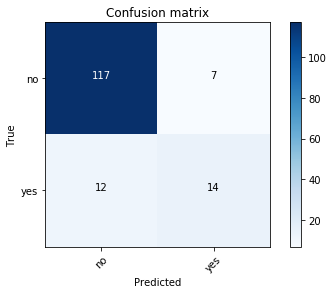

In [150]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred, labels = None, sample_weight = None)
    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

In [151]:
print(svc.n_support_)


print(svc.support_)
# to identify the support vectoe use support_vectors) attribure. The data that become the support_vectors_ . 
# The data that become the support vector are

print(svc.support_vectors_)

[9 8]
[13 20 21 34 38 58 63 73 86  0 19 22 67 68 81 94 96]
[[ 3.0000e+01  1.0000e+00  1.0000e+00  1.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  2.0000e+00  4.0000e+00  1.5760e+03  3.0000e+00
   9.9900e+02  0.0000e+00  0.0000e+00  1.4000e+00  9.3918e+01 -4.2700e+01
   4.9590e+00  5.2281e+03]
 [ 2.8000e+01  2.0000e+00  1.0000e+00  6.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  1.0000e+00  8.0000e+00  3.0000e+00  2.8000e+02  1.0000e+00
   9.9900e+02  0.0000e+00  0.0000e+00 -1.8000e+00  9.3075e+01 -4.7100e+01
   1.3650e+00  5.0991e+03]
 [ 2.5000e+01  4.0000e+00  1.0000e+00  4.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  1.0000e+00  2.0000e+00  4.0000e+00  1.1870e+03  3.0000e+00
   9.9900e+02  0.0000e+00  0.0000e+00  1.4000e+00  9.3918e+01 -4.2700e+01
   4.9630e+00  5.2281e+03]
 [ 2.8000e+01  3.0000e+00  0.0000e+00  3.0000e+00  1.0000e+00  1.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  3.0000e+00  3.3400e+02  1.0000e+00
   9.9900e+02  0.0000e+00  0.0000e+00 -1.8000e

# LINEAR KERNEL WITH REGULARIZATION

### Building the model

In [152]:
svc = svm.SVC(kernel='linear', C=0.1).fit(x_training, y_training)
svc

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Computing the accuracy

In [153]:
y_pred = svc.predict(x_validation)

y_true = y_validation

svc.score(x_validation,y_validation)

accuracy = metric.accuracy_score(y_true, y_pred, normalize = False )

accuracy = (accuracy/x_validation.shape[0])*100
print(accuracy)

90.66666666666666


### Plotting the confusion matrix

Confusion matrix, without normalization
[[120   4]
 [ 10  16]]


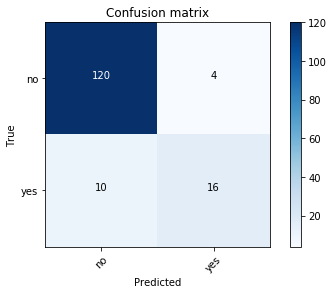

In [154]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred, labels = None, sample_weight = None)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

# RBF KERNEL

### Building the model

In [155]:
svc = svm.SVC(kernel='rbf', degree=2, gamma='auto').fit(x_training, y_training)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Computing the accuracy

In [156]:
y_pred = svc.predict(x_validation)

y_true = y_validation

svc.score(x_validation,y_validation)

accuracy = metric.accuracy_score(y_true, y_pred, normalize = False )

accuracy = (accuracy/x_validation.shape[0])*100
print(accuracy)

92.0


### Plotting the confusion matrix

Confusion matrix, without normalization
[[124   0]
 [ 12  14]]


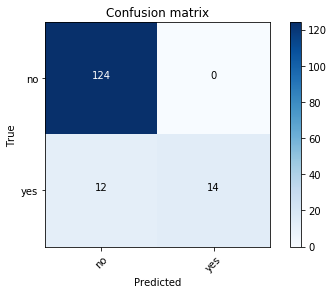

In [157]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred, labels = None, sample_weight = None)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

# RBF KERNEL WITH REGULARIZATION

### Building the model

In [175]:
svc = svm.SVC(kernel='rbf',C= 5, degree=3, gamma='auto').fit(x_training, y_training)
svc

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Computing the accuracy

In [176]:
y_pred = svc.predict(x_validation)

y_true = y_validation

svc.score(x_validation,y_validation)

accuracy = metric.accuracy_score(y_true, y_pred, normalize = False )

accuracy = (accuracy/x_validation.shape[0])*100
print(accuracy)

92.0


### Plotting the confusion matrix

Confusion matrix, without normalization
[[124   0]
 [ 12  14]]


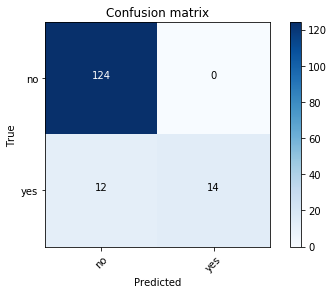

In [177]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred, labels = None, sample_weight = None)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

# POLYNOMIAL KERNEL

### Building the model

In [178]:
svc = svm.SVC(kernel='poly', C = 0.01, degree =2, probability=True).fit(x_training, y_training)

svc

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Computing the accuracy

In [179]:
y_pred = svc.predict(x_validation)

y_true = y_validation

svc.score(x_validation,y_validation)

accuracy = metric.accuracy_score(y_true, y_pred, normalize = False )

accuracy = (accuracy/x_validation.shape[0])*100
print(accuracy)

94.0


### Plotting the confusion matrix

Confusion matrix, without normalization
[[119   5]
 [  4  22]]


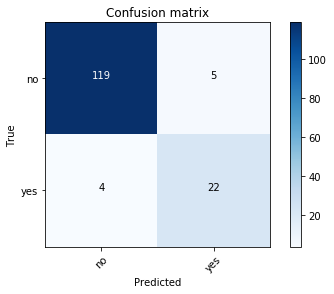

In [180]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred, labels = None, sample_weight = None)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

# POLYNOMIAL KERNEL WITH REGULARIZATION

### Building the model

In [181]:
svc = svm.SVC(kernel='poly', C = 1, degree =3, probability=True).fit(x_training, y_training)

svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Computing the accuracy

In [182]:
y_pred = svc.predict(x_validation)

y_true = y_validation

svc.score(x_validation,y_validation)

accuracy = metric.accuracy_score(y_true, y_pred, normalize = False )

accuracy = (accuracy/x_validation.shape[0])*100
print(accuracy)

96.0


### Plotting the confusion matrix

Confusion matrix, without normalization
[[123   1]
 [  5  21]]


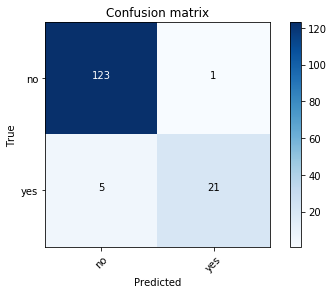

In [183]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred, labels = None, sample_weight = None)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

In [135]:
svc.n_support_

array([11,  4])

In [136]:
svc.support_

array([13, 20, 34, 37, 38, 58, 63, 73, 78, 79, 86, 19, 68, 81, 94])

# RESULTS

    Model                             C-VALUE             ACCURACY
    
    Linear                            Default = 0.007     87.3333
    Linear with Regularization        0.01                90.6666
    RBF                               Default =  1        92   
    RBF with Regularization           5/10/0.1            92
    Polynomial                        Default = 0.01      94 
    Polynomial with Regularization    1                   96


Just as before the accuracy may be 100%. But the whole datasets now becomes support vectors.
It is a clear sign of overfitting.
When the whole dataset become support vectors, it implies that tha model memorizrs the data rather than generalizing it.
Thus, we should avoid using RBF for this dataset.


# CONCLUSION

With Multiple models and validated using different samples, the highest accuracy achieved is 96% as you can see from the table above.

In conclusion, the support vectors in SVM are the quality data that we can ise to generate the decision boundary (of the same model). Non-Support vector data can be ifnored, regardless of how many data you have. This also implies that the SVM can overcome with ease the imbalance amount of data between classes. That is one of the strengths of SVM.

When the no of support vectors represent the whole dataset, the model us overfit because it memorizes the whole dataset and cannot be generalized to predict newdata outside the training set.